<a href="https://colab.research.google.com/github/adityadutt09/Phys498Projects/blob/main/Phys498CMP_Project0_Cellular_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import sys

In [ ]:
state = np.zeros((100,100))
state[0:100, 0:100] = 0

In [ ]:
#Initialize half the state to black (1) and half to white (0)
state[0:100,0:50] = 1
state

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

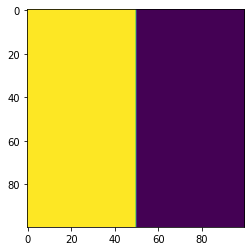

In [ ]:
plt.imshow(state)

In [ ]:
def boundary(state, site_index):
  #Checking if the indices are at the boundaries of the state

  #Create an array to store the possible neighbours of a site
  neighbours = []

  #Add top neighbour
  if(site_index[0] > 0):
    neighbours.append((site_index[0] - 1, site_index[1]))
  
  #Add bottom neighbour
  if(site_index[0] < 99):
    neighbours.append((site_index[0] + 1, site_index[1]))
  
  #Add left neighbour
  if(site_index[1] > 0):
    neighbours.append((site_index[0], site_index[1] - 1))
  
  #Add right neighbour
  if(site_index[1] < 99):
    neighbours.append((site_index[0], site_index[1] + 1))
  
  #Use np.random.choice
  n_index = np.random.choice(len(neighbours))
  
  return neighbours[n_index]

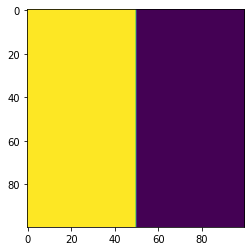

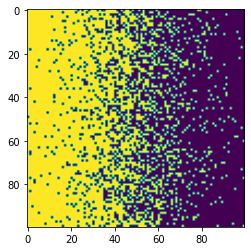

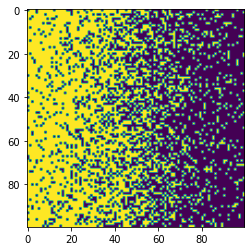

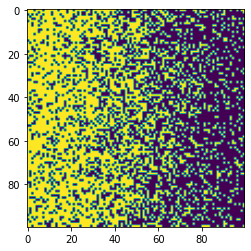

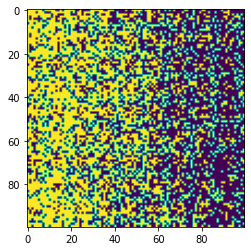

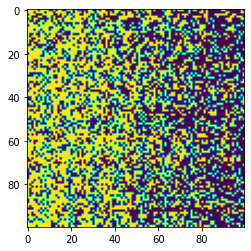

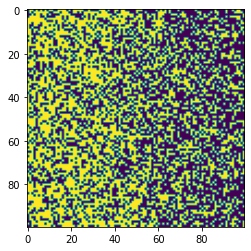

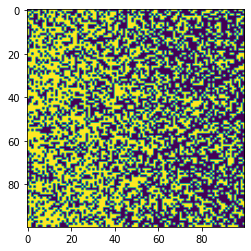

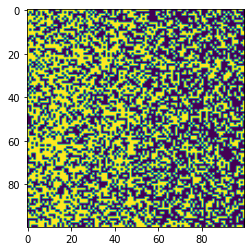

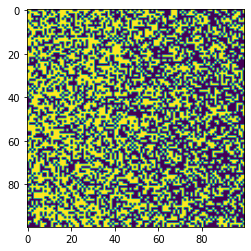

In [ ]:
n_sweeps = 5000
compressed_state = []

for p in range(n_sweeps):
  if(p % 500 == 0):
    fig = plt.figure()
    plt.imshow(state)
    plt.savefig('Sweep' + str(p))

  #Create array of site_indices and its neighbours
  #Randomly selecting the site
  site_index = (np.random.randint(0,100, 100*100), np.random.randint(0,100, 100*100)) 
  
  for q in range(100*100):
    #Randomly selecting one of the site's neighbours
    neigh_index = boundary(state, site_index[q])

    #Swapping
    site = state[site_index[q]]
    state[site_index[q]] = state[neigh_index]
    state[neigh_index] = site
  
  #Compress the state after every sweep and store
  compressed_state.append(sys.getsizeof(gzip.compress(state.tobytes())))

In [ ]:
sweeps = range(n_sweeps)
fig = plt.figure()
plt.plot(sweeps, compressed_state)
plt.xlabel('Sweeps')
plt.ylabel('# of compressed bits')
plt.savefig('Entropy_Sweep.png')

NameError: ignored

Code Testing Segment:

In [ ]:
# state = np.zeros((100,100))
# state[0:100, 0:100] = 0
# state[0:100, 0:50] = 1

# for i in range(n_sweeps):
#   if(i % 500 == 0):
#     fig = plt.figure()
#     plt.imshow(state)
#   for j in range(100*100):
#     #Randomly selecting the site
#     site_index = np.random.randint(100, size=2)
    
#     #Randomly selecting one of the site's neighbours
#     neigh_index = boundary(state, site_index)

#     #Swapping
#     site = state[site_index[0],site_index[1]]
#     state[site_index[0],site_index[1]] = state[neigh_index]
#     state[neigh_index] = site
  

In [ ]:
# #Randomly selecting the site
# compressed_state = []
# site_index = np.random.randint(100, size=2)
    
# #Randomly selecting one of the site's neighbours
# neigh_index = boundary(state, site_index)

# #Swapping
# site = state[site_index[0],site_index[1]]
# state[site_index[0],site_index[1]] = state[neigh_index]
# state[neigh_index] = site

# # Compress the state after every sweep and store
# bits = len(gzip.compress(state.tobytes()))
# bits
# # compressed_state.append(bits)
# # compressed_state